# Open CV  
### VisionOverflow

###### https://docs.opencv.org/
###### 1999년 intel에서 개발하기 시작하여 2000년에 첫번째 릴리즈
###### 컴퓨터 비전, 머신러닝과 관련된 다양한 알고리즘 지원
###### 다양한 언어 지원 (python,java,c++)
###### 다양한 운영체제 (window,linux,mac,android,Ios)
###### numpy,SciPy,Matplotlib와 연동가능

In [53]:
# pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt # 이미지 시각화
from PIL import Image # 이미지 시각화
import requests
from io import BytesIO
cv2.__version__

'4.4.0'

#### color RGB(openCV : BGR) 0~255 *3 
#### grayscale 0~255

In [100]:
img_url="https://miro.medium.com/max/800/1*jQFE4nKOYj8J5TMgj8RxIw.jpeg"

respones = requests.get(img_url)
pic = Image.open(BytesIO(respones.content))


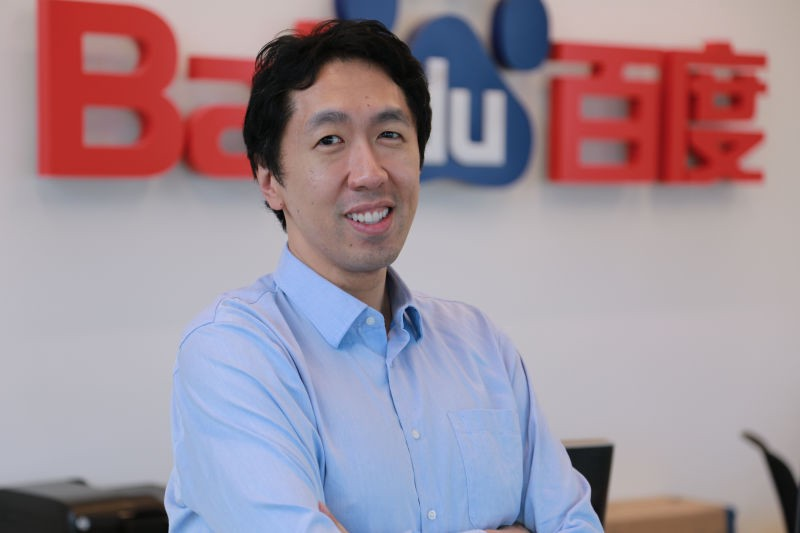

In [101]:
pic

In [102]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

#### 이미지 행렬 변환

In [103]:
matrix_img=np.asarray(pic)
matrix_img

array([[[189, 178, 176],
        [189, 178, 176],
        [189, 178, 176],
        ...,
        [180, 166, 157],
        [180, 166, 157],
        [180, 166, 157]],

       [[189, 178, 176],
        [189, 178, 176],
        [189, 178, 176],
        ...,
        [180, 166, 157],
        [180, 166, 157],
        [180, 166, 157]],

       [[189, 178, 176],
        [189, 178, 176],
        [189, 178, 176],
        ...,
        [180, 166, 157],
        [180, 166, 157],
        [180, 166, 157]],

       ...,

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 41,  42,  44],
        [ 35,  36,  40],
        [ 29,  30,  34]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 40,  41,  43],
        [ 34,  35,  39],
        [ 28,  29,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 39,  40,  42],
        [ 33,  34,  38],
        [ 27,  28,  32]]

In [104]:
matrix_img.shape

(533, 800, 3)

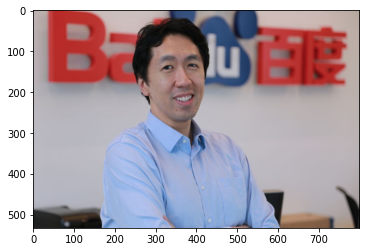

In [105]:
plt.imshow(pic)

In [106]:
andrew_ng=matrix_img.copy()

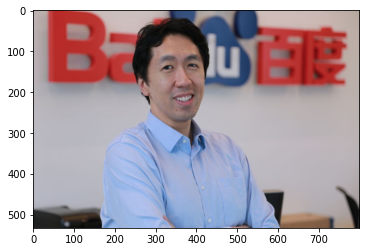

In [107]:
plt.imshow(matrix_img[:,:,:])

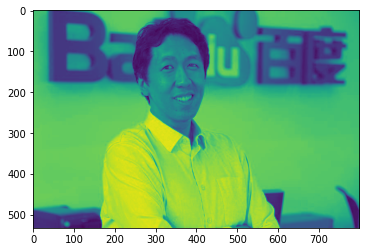

In [110]:
a_img=matrix_img[:,:,2]

plt.imshow(matrix_img[:,:,2])

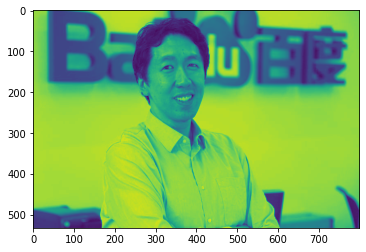

In [111]:
plt.imshow(matrix_img[:,:,1
                     ])

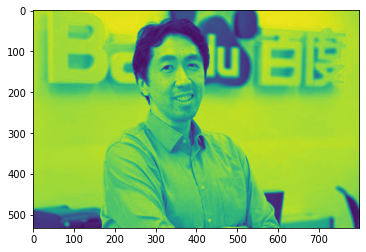

In [112]:
plt.imshow(matrix_img[:,:,0])

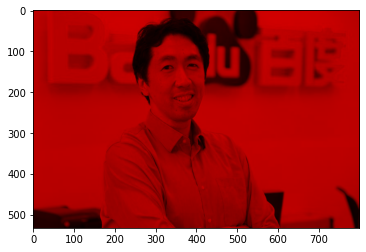

In [113]:
#red andrew
red_andrew=andrew_ng.copy()
red_andrew[:,:,1]=0
red_andrew[:,:,2]=0
plt.imshow(red_andrew)

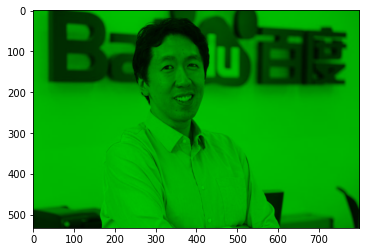

In [114]:
# green_andrew
green_andrew = andrew_ng.copy()
green_andrew[:,:,0]=0
green_andrew[:,:,2]=0
plt.imshow(green_andrew)

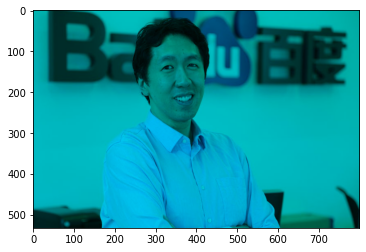

In [117]:
# blue_andrew
blue_andrew = andrew_ng.copy()
blue_andrew[:,:,0]=0
blue_andrew[:,:,0]=0

plt.imshow(blue_andrew)

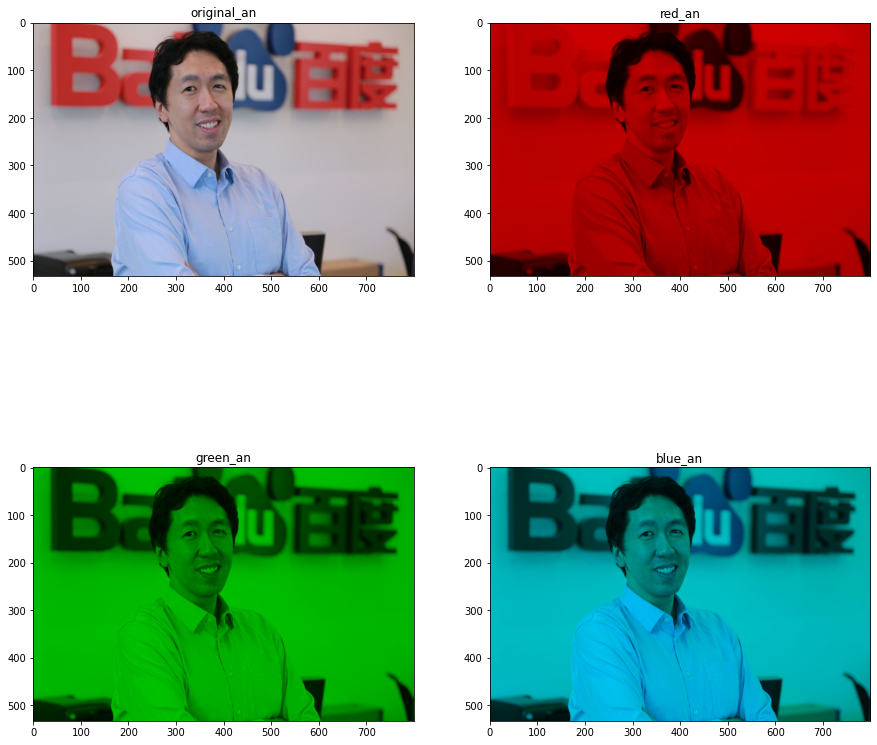

In [118]:
plt.figure(figsize=(15,15))

img_li={"original_an":andrew_ng,"red_an":red_andrew,"green_an":green_andrew,"blue_an":blue_andrew}



for i,matrix in enumerate(img_li.items()) :

    plt.subplot(2,2,i+1)
    plt.title(matrix[0])
    plt.imshow(matrix[1])


######  cv2.COLOR_BGR2RGB  (cv2 색상 -> 표준 색상) 
######  cv2.COLOR_RGB2GRAY 
######  cv2.COLOR_GRAY2RGB

In [121]:
cv2img=cv2.cvtColor(andrew_ng, cv2.COLOR_BGR2RGB)
#cv2img=andrew_ng[:,:,::-1]
cv2.imshow("andrew_ng",cv2img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [122]:
andrew_ng_cv2 = cv2.imread("img_ex/Andrew_ng.jpg",cv2.IMREAD_UNCHANGED)

In [123]:
andrew_ng_cv2.shape

(296, 474, 3)

In [72]:
def cv2imshow(img,iscv2img=True,showMatrix=False):
    if iscv2img==True:
        cv2.imshow("cv2 image",img)
        if showMatrix == True:
            print("img shape",img.shape)
            print(img)
    else:
        cv2img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #cv2img=andrew_ng[:,:,::-1]
        cv2.imshow("cv2 image",cv2img)
        if showMatrix == True:
            print(cv2img.shape)
            print(cv2img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    


In [126]:
cv2imshow(andrew_ng_cv2,iscv2img=True,showMatrix=False)

In [127]:
img_an=cv2.imread("img_ex/Andrew_ng.jpg",cv2.IMREAD_GRAYSCALE)

In [129]:
cv2imshow(img_an)

In [130]:
rand_img = np.random.randint(0,256,size=(256,256,3))

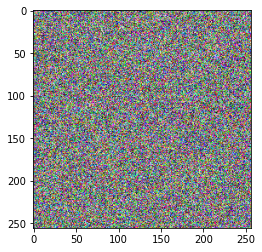

In [131]:
plt.imshow(rand_img)

In [78]:
cv2.imwrite("randimg.png",rand_img)

True

In [132]:
rand_img.shape

(256, 256, 3)

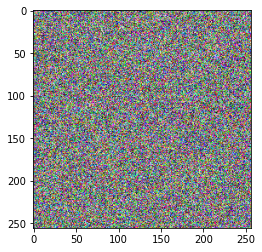

In [133]:
plt.imshow(rand_img)

#### 컬러매핑
###### <b>RGB</b> : Red,Blue,Green 빛의 삼원색
###### <b>CMYK</b> : Cyan,Magenta,Yellow,Black 컬러프린트 인쇄시 사용
###### <b>YUV</b> : Y축은 밝기 U,V는 색상 아날로그 컬러신호
###### <b>YCbCr</b> :디지털TV에 사용 색상정보만 가지고 있음
###### <b>HSV </b> : Hue Saturation Value 색상 채도 명도로 색 표현
###### <b>HSL</b> : Hue Saturation Lightness 로 색 표현 사람이 색상을 인지하는 방식과 유사

In [203]:
puppy_img=cv2.imread("img_ex/cute_puppy.jpg")
puppy_img=cv2.cvtColor(puppy_img,cv2.COLOR_BGR2RGB)

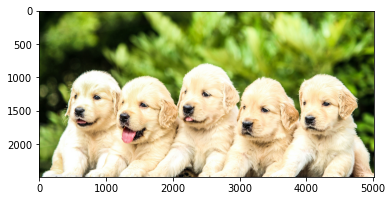

In [204]:
plt.imshow(puppy_img);

In [187]:
img_hsv = cv2.cvtColor(puppy_img,cv2.COLOR_BGR2HSV)

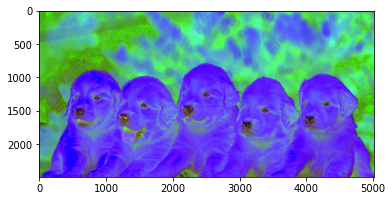

In [188]:
plt.imshow(img_hsv)


In [189]:
print(img_hsv)
print(img_hsv.shape)

[[[ 75 211  41]
  [ 75 206  42]
  [ 74 194  42]
  ...
  [ 80 168 120]
  [ 80 169 119]
  [ 80 171 118]]

 [[ 75 197  44]
  [ 75 197  44]
  [ 74 185  44]
  ...
  [ 80 166 121]
  [ 80 168 120]
  [ 80 169 119]]

 [[ 74 174  47]
  [ 74 174  47]
  [ 74 177  46]
  ...
  [ 80 165 122]
  [ 80 166 121]
  [ 80 168 120]]

 ...

 [[ 78 133  75]
  [ 78 131  76]
  [ 78 129  77]
  ...
  [ 85  11 255]
  [ 86   8 253]
  [ 86   8 253]]

 [[ 78 133  75]
  [ 78 131  76]
  [ 78 129  77]
  ...
  [ 85  11 255]
  [ 86   8 253]
  [ 86   8 253]]

 [[ 78 133  75]
  [ 78 131  76]
  [ 78 129  77]
  ...
  [ 85  11 255]
  [ 85  11 254]
  [ 85  11 254]]]
(2491, 5016, 3)


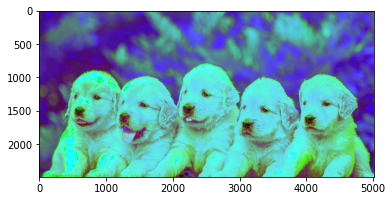

In [190]:
img_hls = cv2.cvtColor(puppy_img,cv2.COLOR_BGR2HLS)
plt.imshow(img_hls)

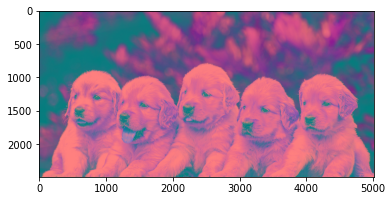

In [191]:
ycrcb_img=cv2.cvtColor(puppy_img,cv2.COLOR_BGR2YCrCb)
plt.imshow(ycrcb_img)

In [192]:
ycrcb_img

array([[[ 29, 112, 125],
        [ 30, 112, 125],
        [ 30, 114, 125],
        ...,
        [ 93,  91, 128],
        [ 92,  91, 128],
        [ 91,  91, 128]],

       [[ 32, 112, 125],
        [ 32, 112, 125],
        [ 32, 114, 125],
        ...,
        [ 94,  91, 128],
        [ 93,  91, 128],
        [ 92,  91, 128]],

       [[ 35, 114, 125],
        [ 35, 114, 125],
        [ 34, 114, 125],
        ...,
        [ 95,  91, 128],
        [ 94,  91, 128],
        [ 93,  91, 128]],

       ...,

       [[ 62, 109, 127],
        [ 63, 109, 127],
        [ 64, 109, 127],
        ...,
        [251, 123, 129],
        [250, 124, 129],
        [250, 124, 129]],

       [[ 62, 109, 127],
        [ 63, 109, 127],
        [ 64, 109, 127],
        ...,
        [251, 123, 129],
        [250, 124, 129],
        [250, 124, 129]],

       [[ 62, 109, 127],
        [ 63, 109, 127],
        [ 64, 109, 127],
        ...,
        [251, 123, 129],
        [250, 123, 129],
        [250, 123, 129]]

In [193]:
img_gray = cv2.cvtColor(puppy_img,cv2.COLOR_BGR2GRAY)

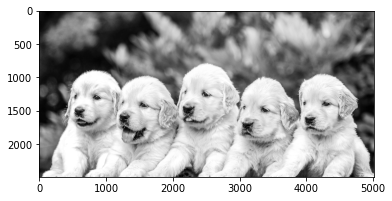

In [202]:
plt.imshow(img_gray,cmap='gray')

### 도형그리기


##### cv2.line(이미지,시작좌표,끝좌표,컬러,두께)
##### cv2.rectangle(이미지,시작좌표,끝좌표,컬러,두께)
##### cv2.circle(이미지,원의중심좌표,반지름,색,두께)

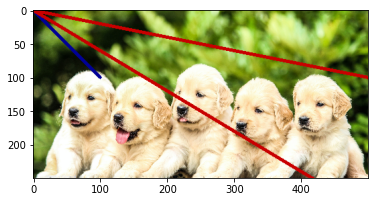

In [213]:
puppy_img=cv2.resize(puppy_img,dsize=(500,250))
line_img1 =  cv2.line(puppy_img,(0,0),(500,300),(200,0,0),3)
plt.imshow(puppy_img)

In [216]:
rectangle = cv2.rectangle(puppy_img,(300,100),(50,50),(0,244,0),4)

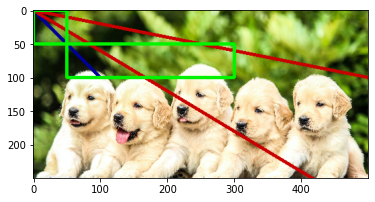

In [217]:
plt.imshow(rectangle)

In [221]:
circle = cv2.circle(puppy_img,(200,200),50,(0,0,244),-1)

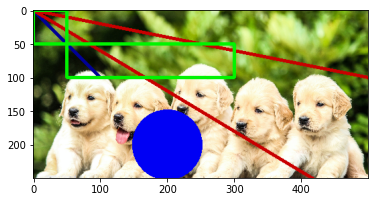

In [222]:
plt.imshow(circle)

In [223]:
ellipse = cv2.ellipse(puppy_img,(300,150),(200,100),0,0,180,(200,200,0),5)

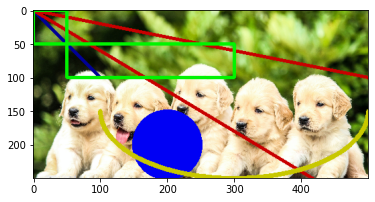

In [224]:
plt.imshow(ellipse)

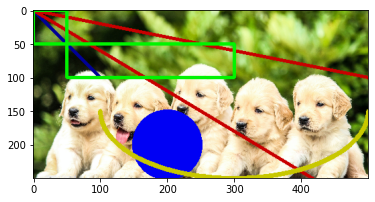

In [225]:
plt.imshow(puppy_img)

In [236]:
pts=np.array([[10,5],[20,30],[70,120],[150,10]],np.int32)
pts.shape

(4, 2)

In [237]:
pts=pts.reshape((-1,2,1))

In [238]:
pts.shape

(4, 2, 1)

In [239]:
poly=cv2.polylines(puppy_img,[pts],True,(0,200,200),6)

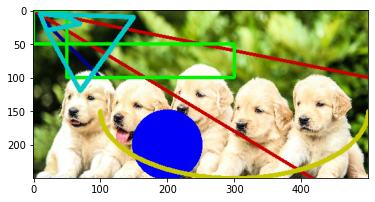

In [240]:
plt.imshow(poly)

In [245]:
text = cv2.putText(puppy_img,"puppy",(200,32),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),3)

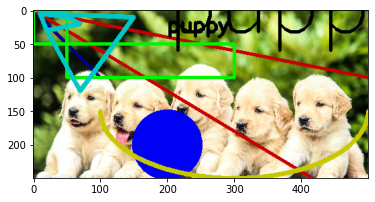

In [246]:
plt.imshow(text)